피벗테이블은 입력값으로 열 단위의 데이터를 취하고 그 데이터에 대한 다차원 요약을 제공하는 2차원 테이블로 항목을 그룹핑한다.

Groupby 집계의 다차원 버전이다

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 성별 생존율 알아보기

titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [4]:
titanic.groupby('sex')[['survived']].mean() #??

,survived
sex,
female,0.742038
male,0.188908


In [5]:
#성별과 좌석 등급별 생존률 (groupby로 구현하기)

titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [7]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


피벗테이블로 작성하기

In [8]:
# 성별과 좌석 등급별 생존률

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


다단계 피벗 테이블

In [13]:
# pd.cut 함수로 age를 구간으로 나누고 표현해 보자

age_cut = pd.cut(titanic['age'], [0,18,80])
age_cut

0      (18, 80]
1      (18, 80]
2      (18, 80]
3      (18, 80]
4      (18, 80]
5           NaN
6      (18, 80]
7       (0, 18]
8      (18, 80]
9       (0, 18]
10      (0, 18]
11     (18, 80]
12     (18, 80]
13     (18, 80]
14      (0, 18]
15     (18, 80]
16      (0, 18]
17          NaN
18     (18, 80]
19          NaN
20     (18, 80]
21     (18, 80]
22      (0, 18]
23     (18, 80]
24      (0, 18]
25     (18, 80]
26          NaN
27     (18, 80]
28          NaN
29          NaN
         ...   
861    (18, 80]
862    (18, 80]
863         NaN
864    (18, 80]
865    (18, 80]
866    (18, 80]
867    (18, 80]
868         NaN
869     (0, 18]
870    (18, 80]
871    (18, 80]
872    (18, 80]
873    (18, 80]
874    (18, 80]
875     (0, 18]
876    (18, 80]
877    (18, 80]
878         NaN
879    (18, 80]
880    (18, 80]
881    (18, 80]
882    (18, 80]
883    (18, 80]
884    (18, 80]
885    (18, 80]
886    (18, 80]
887    (18, 80]
888         NaN
889    (18, 80]
890    (18, 80]
Name: age, Length: 891, 

In [15]:
titanic.pivot_table('survived', ['sex', age_cut], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [16]:
# pd.qcut() 함수를 활용하여 지불된 비용을 분위수로 계산하여 정리해 보자

fare_q = pd.qcut(titanic['fare'], 2)
fare_q

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
5       (-0.001, 14.454]
6      (14.454, 512.329]
7      (14.454, 512.329]
8       (-0.001, 14.454]
9      (14.454, 512.329]
10     (14.454, 512.329]
11     (14.454, 512.329]
12      (-0.001, 14.454]
13     (14.454, 512.329]
14      (-0.001, 14.454]
15     (14.454, 512.329]
16     (14.454, 512.329]
17      (-0.001, 14.454]
18     (14.454, 512.329]
19      (-0.001, 14.454]
20     (14.454, 512.329]
21      (-0.001, 14.454]
22      (-0.001, 14.454]
23     (14.454, 512.329]
24     (14.454, 512.329]
25     (14.454, 512.329]
26      (-0.001, 14.454]
27     (14.454, 512.329]
28      (-0.001, 14.454]
29      (-0.001, 14.454]
             ...        
861     (-0.001, 14.454]
862    (14.454, 512.329]
863    (14.454, 512.329]
864     (-0.001, 14.454]
865     (-0.001, 14.454]
866     (-0.001, 14.454]
867    (14.454, 512.329]
868     (-0.001, 14.454]
869     (-0.001, 14.454]


In [17]:
titanic.pivot_table('survived', ['sex', age_cut], [fare_q, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  

기타 피벗 테이블 옵션

Signature: titanic.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in the
pivot table will be stored in MultiIndex objects (hierarchical indexes) on
the index and columns of the result DataFrame

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The list
    can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed, it
    is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The list
    can contain any of the other types (except list).
    Keys to group by on the pivot table column.  If an array is passed, it
    is being used as the same manner as column values.
aggfunc : function or list of functions, default numpy.mean
    If list of functions passed, the resulting pivot table will have
    hierarchical columns whose top level are the function names (inferred
    from the function objects themselves)
fill_value : scalar, default None
    Value to replace missing values with
margins : boolean, default False
    Add all row / columns (e.g. for subtotal / grand totals)
dropna : boolean, default True
    Do not include columns whose entries are all NaN
margins_name : string, default 'All'
    Name of the row / column that will contain the totals
    when margins is True.

Examples
--------
>>> df
   A   B   C      D
0  foo one small  1
1  foo one large  2
2  foo one large  2
3  foo two small  3
4  foo two small  3
5  bar one large  4
6  bar one small  5
7  bar two small  6
8  bar two large  7

>>> table = pivot_table(df, values='D', index=['A', 'B'],
...                     columns=['C'], aggfunc=np.sum)
>>> table
          small  large
foo  one  1      4
     two  6      NaN
bar  one  5      4
     two  6      7

Returns
-------
table : DataFrame

See also
--------
DataFrame.pivot : pivot without aggregation that can handle
    non-numeric data
File:      c:\users\jsong\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py
Type:      method

aggfunc 키워드는 디폴트는 평균이다.

그러나 'sum', 'mean', 'count', 'min', 'max' 등을 지정할 수 있다

In [19]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [23]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc={'survived':sum})

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [31]:
titanic.pivot_table('fare', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


margins 키워드를 통해 그룹별 총합을 구할 수있다

margins_name 키워드의 디포트는 'All'인데 지정가능 하다

In [32]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc={'survived':sum}, margins=True)

class,First,Second,Third,All
sex,,,,
female,91.0,70.0,72.0,233.0
male,45.0,17.0,47.0,109.0
All,136.0,87.0,119.0,342.0


In [33]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [34]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='Total')

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


예제: 출생률 데이타

In [51]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/
# master/births.csv
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [52]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [59]:
births.shape

(15547, 6)

In [54]:
# decade 함수를 만들어 DataFrame체 추가 하자

births['decade'] = 10*(births['year']//10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [55]:
# 연대별 남녀 출생수 비교 테이블 만들기

births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

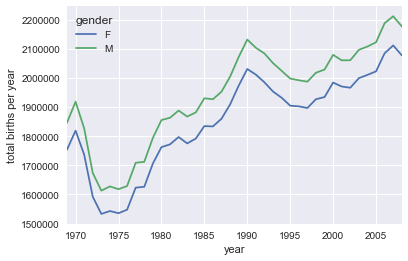

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

이상치 제거를 위한 시그마클리핑

In [58]:
quartile = np.percentile(births['births'], [25,50,75])
quartile

array([ 4358. ,  4814. ,  5289.5])

In [61]:
mu = quartile[1]
mu

4814.0

In [62]:
sig = 0.74*(quartile[2]-quartile[0]) #표본평균의 추정치임
sig

689.30999999999995

In [63]:
# 이상치 제거하고 births DataFrame을 재정리하기

births = births.query('(births > @mu - 5*@sig) & (births < @mu + 5*@sig)')

In [64]:
# day 열에 일부 null 값이 존재 함으로 데이터 타입이 문자열임
# 따라서 정수형으로 설정하여 계산이 가능하도록 만들어야함

births['day'] = births['day'].astype(int)

C:\Users\jsong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [72]:
#요일 빠르게 계산하기

births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, 
                             format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

C:\Users\jsong\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


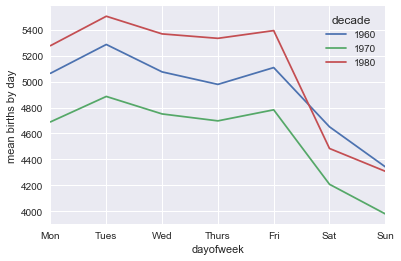

In [73]:
# 위의 인덱스를 활용하여 요일별 출생수를 그릴 수 있음

import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']) 
plt.ylabel('mean births by day');

In [76]:
#연도내 일별 출생수 그래프 그리기

# 먼저 데이터를 월과 일별로 분류하자

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
   6   4668.150
   7   4706.925
   8   4629.650
   9   4537.775
   10  4591.700
   11  4675.150
   12  4700.800
   13  4730.050
   14  4816.200
   15  4733.650
   16  4665.025
   17  4654.650
   18  4707.325
   19  4731.525
   20  4767.525
   21  4790.250
   22  4742.800
   23  4666.750
   24  4653.200
   25  4698.000
   26  4715.900
   27  4747.025
   28  4771.800
   29  4702.300
   30  4644.225
...         ...
12 2   4830.300
   3   4758.500
   4   4718.725
   5   4734.675
   6   4683.050
   7   4704.325
   8   4803.800
   9   4793.825
   10  4785.325
   11  4738.500
   12  4791.300
   13  4676.675
   14  4792.100
   15  4920.800
   16  4968.100
   17  4951.600
   18  4936.375
   19  4962.925
   20  4877.025
   21  4816.100
   22  4661.925
   23  4466.675
   24  4126.250
   25  3844.450
   26  4383.525
   27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [77]:
# 연 월 일 날짜 표현 방식으로 전화 하자

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


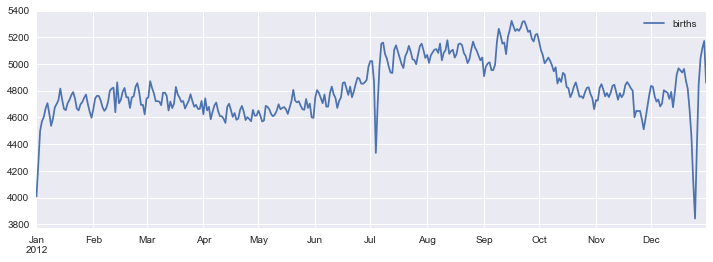

In [79]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)